## Analyse the data

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from IPython import display

In [2]:
df = pd.read_csv('data/data.csv')

In [3]:
df.head(-5)

,area,adress,price,price_per_sqm,monthly_fee,size_in_sqm,date_sold
0,Södermalm,"Götgatan 128, 3tr",4850000,74615,2798.0,65,2023-02-03
1,Årsta,Möckelvägen 32,2650000,63095,3281.0,42,2023-02-03
2,Södermalm,Heleneborgsgatan 30,4500000,97826,2451.0,46,2023-02-02
3,Östermalm,"Körsbärsvägen 10, 5tr",5025000,94811,2664.0,53,2023-02-02
4,Vasastan,"Anna Steckséns Gata 15, 10 tr",4900000,128947,2387.0,38,2023-02-02
...,...,...,...,...,...,...,...
2130,Fredhäll,Rålambsvägen 52,4150000,97647,2244.0,42,2022-02-14
2131,Vasastan,Rörstrandsgatan 27,5035000,125875,1364.0,40,2022-02-14
2132,Årsta,Tämnarvägen 36,3550000,64545,3057.0,55,2022-02-14
2133,Fredhäll,"Adlerbethsgatan 15, 2tr",4700000,102174,2630.0,46,2022-02-13


Avg. price of apt over areas

Avg. price per sqr over areas

Avg. size of the apt over areas

Avg. monthly fee over areas

Top xx highest and lowest prices of apts

Check std of the prices per area to see if median or mean makes sense

Price over time and areas


#### In the introduction we had some questions we want to find in the project, they are:

#### * What is the median salary for data analysts/engineers in Stockholm, and how does this compare to the prices of two-room apartments in the different areas?

#### * How much money should we save up before moving in order to be able to afford a two-room apartment in one of the areas, and how long would that take us?

#### * Are there any trends or patterns in the prices of two-room apartments in the areas over time (e.g. increases or decreases in prices)?

##### According to Glassdoor, the estimated median salary for a Junior Data Analyst is SEK 34,175 per month in Stockholm, Sweden. 
##### https://www.glassdoor.com/Salaries/stockholm-junior-data-analyst-salary-SRCH_IL.0,9_IM1136_KO10,29.htm

In [5]:
median_salary = 34175*12 # salary stated without note means before tax

# now let's find the median price of 2-room apartments in each area
median_prices = df.groupby('area')['price'].median()

# Compare the median salary to the median prices in each area
price_to_salary_ratios = median_prices / median_salary

price_to_salary_ratios = price_to_salary_ratios.rename('price_to_salary_ratio')

price_to_salary_ratios_sorted = price_to_salary_ratios.sort_values(ascending=False)

print(price_to_salary_ratios_sorted)

area
Östermalm    15.605950
Vasastan     13.191904
Södermalm    11.460619
Fredhäll      9.266033
Årsta         7.437210
Name: price_to_salary_ratio, dtype: float64


##### Now we can see that the median price of 2-room apartments in each area, compare to a juinior data analyst's yearly income (before tax):
##### Östermalm has the highest ratio and Årsta has the lowest.


##### Given the downpayment need to be 15%, let calculate how much saving is needed to afford an apartment in these areas.

##### Let's say if the junior analyst could save SEK 10000 per month, and how many years they need to save up to for the down payment

In [31]:
savings_needed = median_prices * 0.15
monthly_savings = 34_175 * 0.781 - 15_900  
# 0.781 is the tax rate in Stockholm, and SEK 15900 is a calculated number of living cost for a young adult living in Stockholm
years_to_save = savings_needed / monthly_savings / 12
years_to_save = years_to_save.rename('years_to_save')
years_to_save_sorted = years_to_save.sort_values(ascending = False)
print(years_to_save_sorted)

area
Östermalm    7.413809
Vasastan     6.266985
Södermalm    5.444516
Fredhäll     4.401949
Årsta        3.533143
Name: years_to_save, dtype: float64


##### The number of years seems to be a bit depressing... especially if one wants to live in Östermalm.
##### However, if the junior data analyst wants to live in Årsta, it won't take them too long to save up for the down payment.
##### It is also important to keep in mind that there are other factors to be considered, for example, the income of the junior analyst could increase during the time, and there could also be policies change for down payment etc.

##### Let's also tale a look at the trends in the prices of the two-room apartments in the areas over time

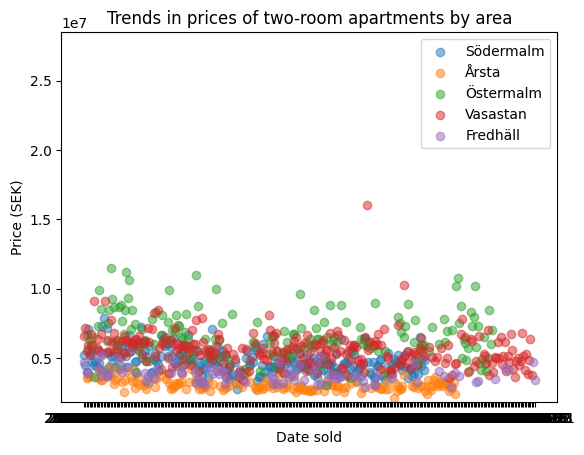

In [29]:
time_trends = df.groupby(['area', 'date_sold'])['price'].mean()

time_trends = time_trends.reset_index()

# Create a scatter plot for each area
for area in df['area'].unique():
    data = time_trends[time_trends['area'] == area]
    plt.scatter(data['date_sold'], data['price'], label=area, alpha=0.5)

# Set y-axis limits to cover the range of prices in the data
plt.ylim(df['price'].min() * 0.9, df['price'].max() * 1.1)

# Add plot title, axis labels, and legend
plt.title('Trends in prices of two-room apartments by area')
plt.xlabel('Date sold')
plt.ylabel('Price (SEK)')
plt.legend()

# Show the plot
plt.show()

##### It seems that there is no very obvious trends, hard to tell if it is increasing or decreasing, it could be that the time frame of the collected data is quite short
##### It is also interesting to see that a few apartments in Vasastan were sold with very high price
##### Let's take a look at the most expensive apartment and see why is it special

In [36]:
df_sorted = df.sort_values(by='price', ascending=False)

most_expensive_apt = df_sorted.iloc[0]

print(most_expensive_apt)


area                           Vasastan
adress           Upplandsgatan 17B, 2tr
price                          25900000
price_per_sqm                    104016
monthly_fee                     10997.0
size_in_sqm                         249
date_sold                    2022-11-23
Name: 302, dtype: object


##### We can see it's a very big apartment 249 square meters and it is located very central in Stockhol. 
##### Out of curiosity, I have searched for this apartment and found
##### The apartment is huge and from teh pictures seem to be an office.

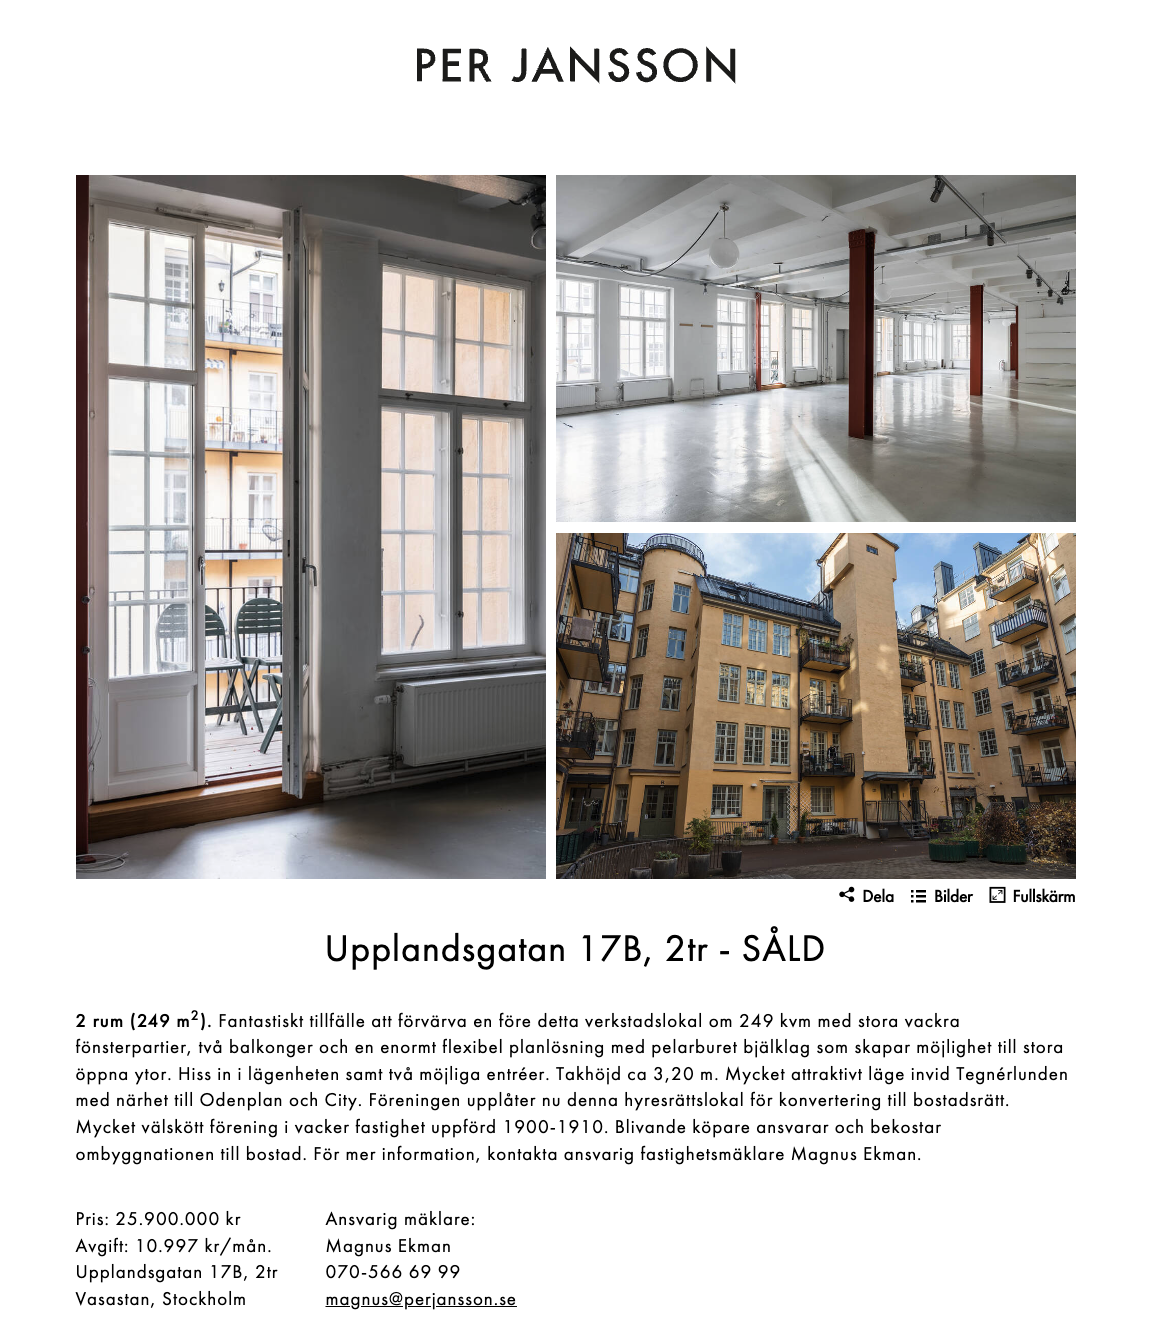

In [41]:
display.Image("img/Screenshot 2023-05-02 at 00.00.54.png", width=700, height=550)